In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from imp import reload
import torch.nn as nn

import sys
sys.path.append("..")
import vnn
import vec_models
import nonvec_models
import train_models
from scipy.stats import pearsonr
reload(vnn)
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#results[DSET][MODEL][METHOD][SIGN]

In [11]:
train_loader, test_loader = train_models.load_cifar(128, shuffle_train=False)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
def compute_tsne(model, model_dir, epoch, train_loader, truncate_layer, num_pcs=125, perplexity=10, nonvec=True):
    checkpoint = torch.load(model_dir + '/epoch_{}.pt'.format(epoch))
    model.load_state_dict(checkpoint['model_state_dict'], strict=False)
    model = model.to(0)
    truncated_model = model.sequential[:truncate_layer] if nonvec else model[:truncate_layer]
    full_output = None
    i = 0
    n = 1024*10
    for data, labels in train_loader:
        input = vnn.expand_input_conv(data, 10) if not nonvec else data
        output = truncated_model(input.to(0)).cpu()
        output = output.view(len(output), -1)
        dim = output.shape[-1]
        if full_output is None:
            full_output = np.zeros((n, dim))
            full_labels = np.zeros((n,))
        full_output[i:i+len(output)] = output.detach().clone().numpy()
        full_labels[i:i+len(output)] = labels
        i += len(output)
        if i >= n:
            break
    X = full_output
    print("Done model")
    
    #do PCA
    X -= X.mean(axis=0)
    pca = PCA(n_components=num_pcs)
    X_pca = pca.fit_transform(X)
    print("Done PCA")
    X_tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(X_pca)
    print("Done TSNE")
    
    rel_std_tsne = np.zeros(10)
    rel_std_pca = np.zeros(10)
    for i in range(10):
        mask = full_labels == i    
        rel_std_tsne[i] = (X_tsne[mask].std(axis=0) / X_tsne.std(axis=0)).mean()
        
    return X_tsne, rel_std_tsne, full_labels

def compute_both_tsnes(model, model_dir, epoch_pair, train_loader, truncate_layer,
                       num_pcs=200, perplexity=10, nonvec=True):
    X_tsne_1, rel_std_tsne_1, labels_1 = compute_tsne(
        model=model, model_dir=model_dir, epoch=epoch_pair[0], train_loader=train_loader,
        truncate_layer=truncate_layer, num_pcs=num_pcs, perplexity=perplexity, nonvec=nonvec)
    X_tsne_2, rel_std_tsne_2, labels_2 = compute_tsne(
        model=model, model_dir=model_dir, epoch=epoch_pair[1], train_loader=train_loader,
        truncate_layer=truncate_layer, num_pcs=num_pcs, perplexity=perplexity, nonvec=nonvec)
    return X_tsne_1, X_tsne_2, rel_std_tsne_1, rel_std_tsne_2, labels_1 #= labels_2

    

In [17]:

X_tsne_1i, X_tsne_1f, rel_std_tsne_1i, rel_std_tsne_1f, labels = compute_both_tsnes(
    model=nonvec_models.make_cifar_nonvec_conv(True),
    model_dir='../experiments/models2/cifar_nonvec_conv_bp_mixed',
    epoch_pair=(0, 100),
    train_loader=train_loader,
    truncate_layer=12
)

X_tsne_2i, X_tsne_2f, rel_std_tsne_2i, rel_std_tsne_2f, _ = compute_both_tsnes(
    model=nonvec_models.make_cifar_nonvec_conv(True),
    model_dir='../experiments/models2/cifar_nonvec_conv_bp_mono',
    epoch_pair=(0, 100),
    train_loader=train_loader,
    truncate_layer=12
)

X_tsne_3i, X_tsne_3f, rel_std_tsne_3i, rel_std_tsne_3f, _ = compute_both_tsnes(
    model=nonvec_models.make_cifar_nonvec_conv(True),
    model_dir='../experiments/models2/cifar_nonvec_conv_df_mixed',
    epoch_pair=(0, 100),
    train_loader=train_loader,
    truncate_layer=12
)

X_tsne_4i, X_tsne_4f, rel_std_tsne_4i, rel_std_tsne_4f, _ = compute_both_tsnes(
    model=nonvec_models.make_cifar_nonvec_conv(True),
    model_dir='../experiments/models2/cifar_nonvec_conv_df_mono',
    epoch_pair=(0, 100),
    train_loader=train_loader,
    truncate_layer=12
)

X_tsne_5i, X_tsne_5f, rel_std_tsne_5i, rel_std_tsne_5f, _ = compute_both_tsnes(
    model=vec_models.make_cifar_vec_conv(True),
    model_dir='../experiments/models/cifar_vec_conv_bp_mixed',
    epoch_pair=(0, 190),
    train_loader=train_loader,
    truncate_layer=9,
    nonvec=False
)

X_tsne_6i, X_tsne_6f, rel_std_tsne_6i, rel_std_tsne_6f, _ = compute_both_tsnes(
    model=vec_models.make_cifar_vec_conv(True),
    model_dir='../experiments/models/cifar_vec_conv_bp_mono',
    epoch_pair=(0, 190),
    train_loader=train_loader,
    truncate_layer=9,
    nonvec=False
)

X_tsne_7i, X_tsne_7f, rel_std_tsne_7i, rel_std_tsne_7f, _ = compute_both_tsnes(
    model=vec_models.make_cifar_vec_conv(True),
    model_dir='../experiments/models/cifar_vec_conv_df_mixed',
    epoch_pair=(0, 190),
    train_loader=train_loader,
    truncate_layer=9,
    nonvec=False
)

X_tsne_8i, X_tsne_8f, rel_std_tsne_8i, rel_std_tsne_8f, _ = compute_both_tsnes(
    model=vec_models.make_cifar_vec_conv(True),
    model_dir='../experiments/models/cifar_vec_conv_df_mono',
    epoch_pair=(0, 190),
    train_loader=train_loader,
    truncate_layer=9,
    nonvec=False
)

Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE
Done model
Done PCA
Done TSNE


In [18]:
cluster_diff_1 = rel_std_tsne_1i - rel_std_tsne_1f
cluster_diff_2 = rel_std_tsne_2i - rel_std_tsne_2f
cluster_diff_3 = rel_std_tsne_3i - rel_std_tsne_3f
cluster_diff_4 = rel_std_tsne_4i - rel_std_tsne_4f
cluster_diff_5 = rel_std_tsne_5i - rel_std_tsne_5f
cluster_diff_6 = rel_std_tsne_6i - rel_std_tsne_6f
cluster_diff_7 = rel_std_tsne_7i - rel_std_tsne_7f
cluster_diff_8 = rel_std_tsne_8i - rel_std_tsne_8f

cluster_diff_vals = np.array([cluster_diff_1, cluster_diff_2, cluster_diff_3, cluster_diff_4,
                              cluster_diff_5, cluster_diff_6, cluster_diff_7, cluster_diff_8])
tsne_i = np.array([X_tsne_1i, X_tsne_2i, X_tsne_3i, X_tsne_4i,
                   X_tsne_5i, X_tsne_6i, X_tsne_7i, X_tsne_8i])
tsne_f = np.array([X_tsne_1f, X_tsne_2f, X_tsne_3f, X_tsne_4f,
                   X_tsne_5f, X_tsne_6f, X_tsne_7f, X_tsne_8f])

np.savez("cluster_diff_vals.npz", cluster_diff_vals=cluster_diff_vals, tsne_i=tsne_i, tsne_f=tsne_f, labels=labels)


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

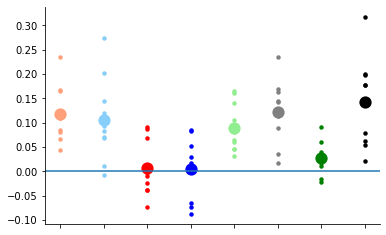

In [19]:
cluster_diff_vals = np.load('cluster_diff_vals.npz')['cluster_diff_vals']
colors = ['lightsalmon', 'lightskyblue', 'red', 'blue', 'lightgreen', 'gray', 'green', 'black']
#dark_colors = ['red', 'blue', 'red', 'blue', 'green', 'black', 'green', 'black']


for i in range(8):
    plt.scatter(np.ones(10)*i, cluster_diff_vals[i], color=colors[i], s=20, lw=0)
    plt.scatter(x=i, y=cluster_diff_vals[i].mean(), color=colors[i], lw=0, s=150)
plt.axhline(0)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels([])

#plt.savefig("../figs/tsne_cluster_quality.pdf", bbox_inches="tight")

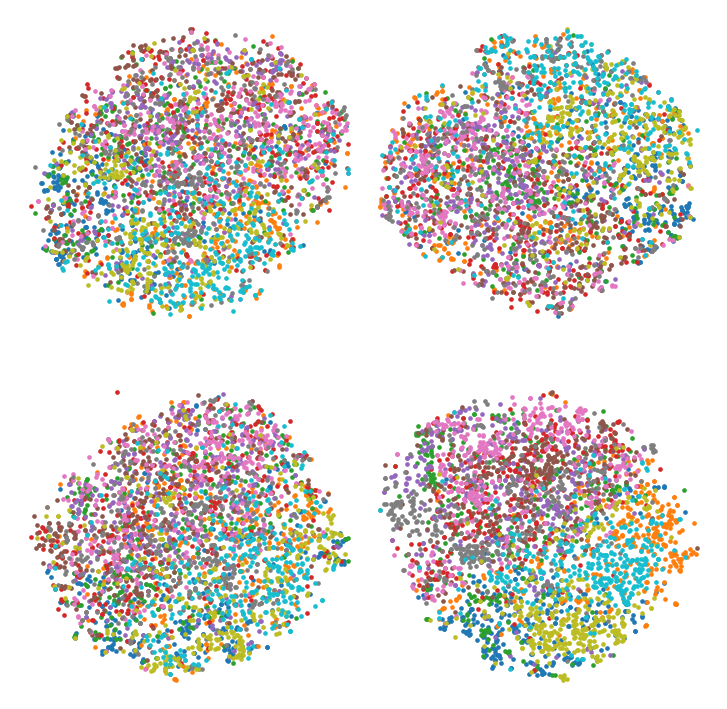

In [68]:
tsne_nonvec_df_mono_i = tsne_i[3]
tsne_nonvec_df_mono_f = tsne_f[3]

tsne_vec_df_mono_i = tsne_i[7]
tsne_vec_df_mono_f = tsne_f[7]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
fig.subplots_adjust(hspace=0.15, wspace=0.0)

for i in range(10):
    mask = np.arange(len(labels))[labels == i][::3]
    axes[0, 0].scatter(tsne_nonvec_df_mono_i[mask, 0], tsne_nonvec_df_mono_i[mask, 1], lw=0, s=5)
    axes[0, 1].scatter(tsne_nonvec_df_mono_f[mask, 0], tsne_nonvec_df_mono_f[mask, 1], lw=0, s=5)
    axes[1, 0].scatter(tsne_vec_df_mono_i[mask, 0], tsne_vec_df_mono_i[mask, 1], lw=0, s=5)
    axes[1, 1].scatter(tsne_vec_df_mono_f[mask, 0], tsne_vec_df_mono_f[mask, 1], lw=0, s=5)

for ax in axes.flatten():
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig("../figs/tsne_viz.pdf", bbox_inches="tight")

In [78]:
# from sklearn.manifold import TSNE
x_ld = TSNE(n_components=2, perplexity=10).fit_transform(pcs)

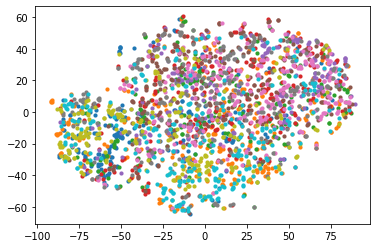

In [79]:
rel_std_vals_2 = np.zeros(10)
for i in range(10):
    mask = cifar_labels == i
    plt.scatter(x_ld[mask, 0], x_ld[mask, 1], lw=0, s=17.5)
    
    rel_std = x_ld[mask].std() / x_ld.std()
    rel_std_vals_2[i] = rel_std

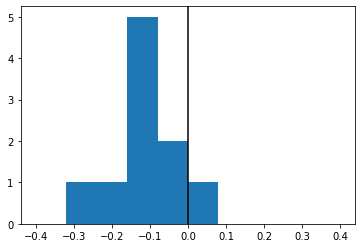

In [91]:
plt.hist(rel_std_vals - rel_std_vals_2, range=(-0.4, 0.4))
plt.axvline(0, color="black")

In [216]:
v1 = [1.0999302,
0.9393843,
0.9530301,
0.9547126,
0.8647485,
0.9575817,
0.9032941,
0.8704286,
1.1364256,
0.93295693]

v2 = [0.7810253,
0.8344856,
0.8382612,
0.82664394,
0.8148676,
0.8175381,
0.65906763,
0.66694266,
0.7339703,
0.779043]

In [92]:
plt.bar(np.arange(10)*3, v1)
plt.bar(np.arange(10)*3 + 1, v2)

NameError: name 'v1' is not defined

In [93]:
#vec, df/bp, mixed/mono
#nonvec, df/bp, mixed/mono

In [8]:
i = 0
for data, labels in train_loader:
    print(labels)
    i += 1
    if i == 2:
        break

tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2,
        2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9,
        6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6,
        1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1,
        2, 2, 9, 2, 6, 6, 1, 9])
tensor([5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6,
        7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4,
        1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0,
        6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0,
        6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4,
        6, 6, 1, 3, 8, 3, 4, 1])
